# Desafio
Telecom X - Análisis de Evasión de Clientes
Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?
✅ Importar y manipular datos desde una API de manera eficiente.
✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.
✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.

#📌 Extracción

In [117]:
import pandas as pd
import json
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Cargar json desde la URL
data = requests.get(url).json()

# Normalizar
df = pd.json_normalize(data)

print(df.head())


   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

#🔧 Transformación

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [119]:
# Diccionario para renombar columnas
nombre_columnas ={"customerID" : "customerID",
  "Churn" : "Churn",
  "customer.gender" :"gender" ,
  "customer.SeniorCitizen" : "SeniorCitizen",
  "customer.Partner": "Partner",
  "customer.Dependents": "Dependents",
  "customer.tenure": "tenure",
  "phone.PhoneService" : "PhoneService",
  "phone.MultipleLines" : "MultipleLines",
	"internet.InternetService" : "InternetService",
  "internet.OnlineSecurity"  : "OnlineSecurity",
	"internet.OnlineBackup" : "OnlineBackup",
	"internet.DeviceProtection": "DeviceProtection",
	"internet.TechSupport" : "TechSupport",
	"internet.StreamingTV" : "StreamingTV",
	"internet.StreamingMovies" : "StreamingMovies",
	"account.Contract" : "Contract",
	"account.PaperlessBilling" : "PaperlessBilling",
	"account.PaymentMethod" : "PaymentMethod",
	"account.Charges.Monthly" : "Charges.Monthly",
  "account.Charges.Total"  : "Charges.Total"
}

# cambiamos nombres de la columnas
df = df.rename(columns=nombre_columnas)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [121]:
df.tail()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [127]:
import numpy as np

df["Charges.Total"] = df["Charges.Total"].replace({" ": '0', ',':''})

# Se valida si quedaron campos vacios
filtro = df["Charges.Total"] == " "
print("\nFilas con '' (cadena vacía): ", df[filtro]["Charges.Total"].count())

# Se convierte campos a float64
df["Charges.Total"] = df["Charges.Total"].astype(np.float64)

df.info()



Filas con '' (cadena vacía):  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract 

In [128]:
# Se valida datos del genero
print(df.groupby("gender")["gender"].count())

# Se valida edad SeniorCitizen
print(df[df["SeniorCitizen"] == ""]["SeniorCitizen"].count())
print(df.groupby("SeniorCitizen")["SeniorCitizen"].count())

gender
Female    3592
Male      3675
Name: gender, dtype: int64
0
SeniorCitizen
0    6085
1    1182
Name: SeniorCitizen, dtype: int64


In [134]:
# Se valida datos duplicados
print("Total Duplicados: ", df.duplicated().sum())

# Se valida valores unicos
print("Valores totales: ", len(df))
print("Valores Unicos: ", df["customerID"].nunique())

# se valida datos del campo Churn
print("Agrupamiento de campo Churn antes de los cambios:", df.groupby("Churn")["Churn"].count())

filtroChurnVacio = df["Churn"] == ""
filtroNoYes = (df[["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies" ]] == "Yes").any(axis=1)

print("Cantidad de Clientes con servicio y campo Churn vacio: ", df[filtroChurnVacio & filtroNoYes]["customerID"].count())
print("Cantidad de Clientes sin servicio y campo Churn vacio", df[filtroChurnVacio & ~filtroNoYes]["customerID"].count())

# se reemplaza los campos vacios que tiene servicio por No
df.loc[filtroChurnVacio & filtroNoYes, "Churn"] = "No"
df.loc[filtroChurnVacio & ~filtroNoYes, "Churn"] = "Yes"
print("Agrupamiento de campo Churn, despues de los cambios :", df.groupby("Churn")["Churn"].count())


Total Duplicados:  0
Valores totales:  7267
Valores Unicos:  7267
Agrupamiento de campo Churn antes de los cambios: Churn
No     5397
Yes    1870
Name: Churn, dtype: int64
Cantidad de Clientes con servicio y campo Churn vacio:  0
Cantidad de Clientes sin servicio y campo Churn vacio 0
Agrupamiento de campo Churn, despues de los cambios : Churn
No     5397
Yes    1870
Name: Churn, dtype: int64


In [138]:
# creando columna Cuentas_Diarias

df["Cuentas_Diarias"] = df["Charges.Monthly"] / 30
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [154]:
# se reemplaza los campos vacios que tiene servicio por No
df.loc[df["Churn"] == "Yes", "Churn"] = "Si"
df.loc[df["Churn"] == "No", "Churn"] = "No"

df.tail()

#df["Churn"] = df["Churn"].astype(np.int64)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [145]:
print("Agrupamiento de campo Contract:", df.groupby("Contract")["Contract"].count())
print("\nAgrupamiento de campo PaymentMethod:", df.groupby("PaymentMethod")["PaymentMethod"].count())


Agrupamiento de campo Contract: Contract
Month-to-month    4005
One year          1519
Two year          1743
Name: Contract, dtype: int64

Agrupamiento de campo PaymentMethod: PaymentMethod
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Electronic check             2445
Mailed check                 1665
Name: PaymentMethod, dtype: int64


In [146]:
# validamos datos nan
df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


#📊 Carga y análisis

In [155]:
# se realiza analisis descriptivo

df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157337
std,0.369074,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


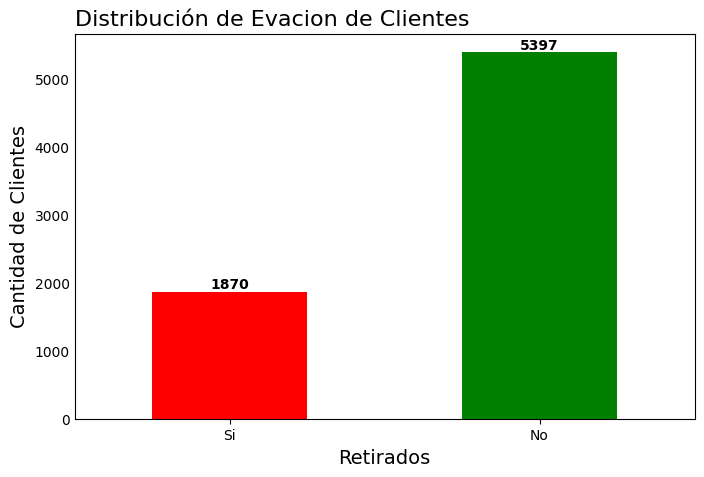

In [180]:
# distribucion de evacion
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))
ax.tick_params(axis='y',which='both',size=0)
cantidad = df["Churn"].value_counts()
colores = ["red" if x == "No" else "green" for x in cantidad.index]
# se crea gráfico
ax = cantidad.sort_values().plot(kind="bar", color=colores)
ax.set_title("Distribución de Evacion de Clientes", loc='left', fontsize=16)
ax.set_xlabel("Retirados", fontsize=14)
ax.set_ylabel("Cantidad de Clientes", fontsize=14)

# se añaden etiquetas
for i, v in enumerate(cantidad.sort_values()):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10, fontweight="bold")
#se rota la palabra para mayor legibilidad
plt.xticks(rotation=360)

plt.show()

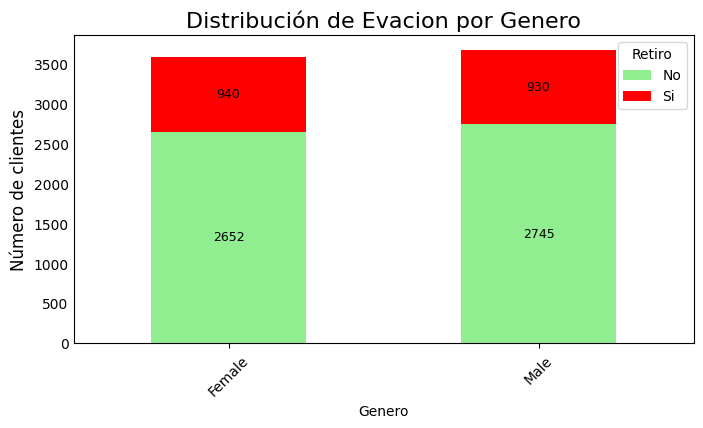

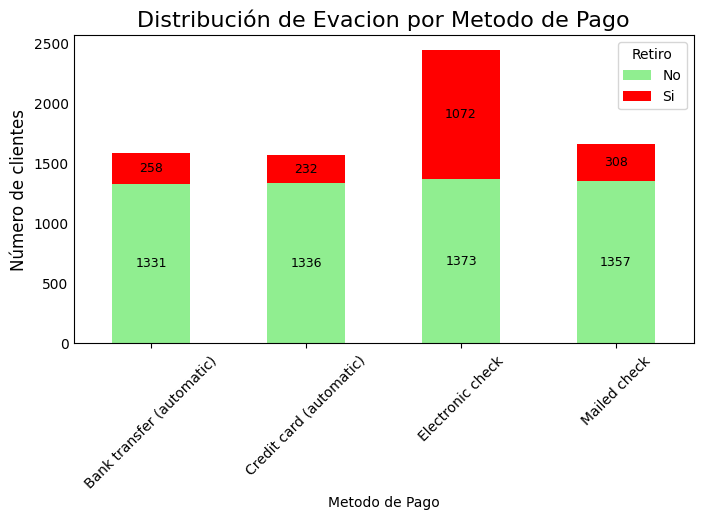

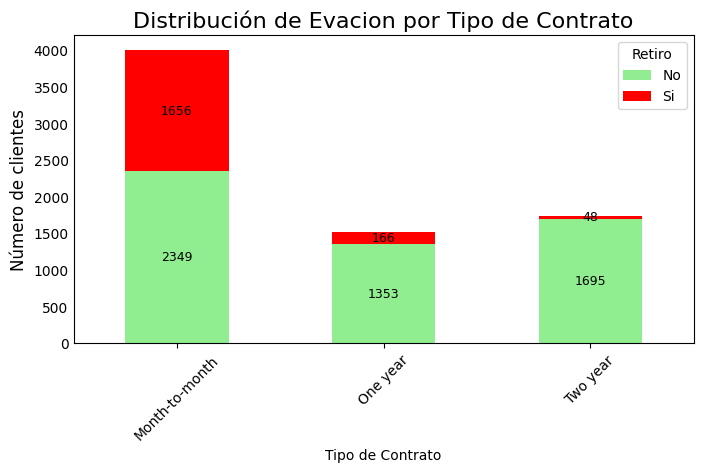

In [203]:
# Recorremos las variables categóricas
categoricas = ["gender", "PaymentMethod", "Contract"]

for var in categoricas:
    # Conteo agrupado
    conteo = df.groupby([var, "Churn"]).size().unstack(fill_value=0)

    # Gráfico de barras apiladas
    conteo.plot(
        kind="bar",
        stacked=True,
        figsize=(8,4),
        color=["lightgreen", "red"]  # No = verde, Si = rojo
    )

    if (var == "gender"):
      xlabel = "Genero"
    else:
      if (var == "PaymentMethod"):
         xlabel = "Metodo de Pago"
      else:
         xlabel = "Tipo de Contrato"

    plt.title(f"Distribución de Evacion por {xlabel}", fontsize=16)
    plt.ylabel("Número de clientes", fontsize=12)
    plt.xlabel(xlabel)

    # Agregar valores encima de las barras
    for i, p in enumerate(plt.gca().patches):
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:
            plt.text(x + width/2, y + height/2, str(int(height)),
                     ha="center", va="center", fontsize=9, color="black")

    plt.legend(title="Retiro", labels=["No", "Si"])
    plt.xticks(rotation=45)
    plt.tick_params(axis='y',which='both',size=0)
    plt.show()

In [233]:
# se revisa datos de tiempo de contrato comporados con la evasion
tiempo_retirado =  df.groupby("Churn")["tenure"].sum()
print("Cantidad de meses x Evasion: \n", tiempo_retirado)

total_gastado =  df.groupby("Churn")["Charges.Total"].sum()
print("\nTotal gastado x Evasion: \n",total_gastado)

tiempo_retirado_det =  df.groupby("Churn")["tenure"].value_counts()
print("Cantidad de meses x Evasion: \n", tiempo_retirado_det)

Cantidad de meses x Evasion: 
 Churn
No    201458
Si     33604
Name: tenure, dtype: int64

Total gastado x Evasion: 
 Churn
No    13685330.15
Si     2862951.70
Name: Charges.Total, dtype: float64
Cantidad de meses x Evasion: 
 Churn  tenure
No     72        363
       1         253
       71        170
       2         123
       3         113
                ... 
Si     71          6
       72          6
       62          5
       63          4
       64          4
Name: count, Length: 145, dtype: int64


#📄Informe final

## Informe Final
### 🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).
###🔹 Limpieza y Tratamiento de Datos: Se realizo inicialmente un reconocimiento de la estructura del archivo .JSON sumunistrado, con el fin de poder entender la logica de lo datos y su naturaleza. Posterior a esto se cargo mediante la libreria de panda y su metodo para leer un archivo JSON y a la ves normalizar el mismo con el fin que quedara de forma tabular y asi poder seguir con los siguientes pasos en el analisis.
###Cuando se comenzo a revisar la data, se observo que habian 224 datos vacios del campo Churn, el cual es el mas importante para el analisis que se realizo, por lo cual mediante una validacion se reemplazaron estos campos en si y no teniendo en cuenta datos de las suscripciones.

###Por otro lado, se reemplazaron datos vacios de la columna de total gastado a cero, y se convirtio la columna a tipo float, con el fin de poder realizar operaciones aritmeticas con dicha columna.

###🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

###🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

###🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.
